In [126]:
from IPython.display import display, Image
import cv2
import numpy as np
from PIL import Image as pimg

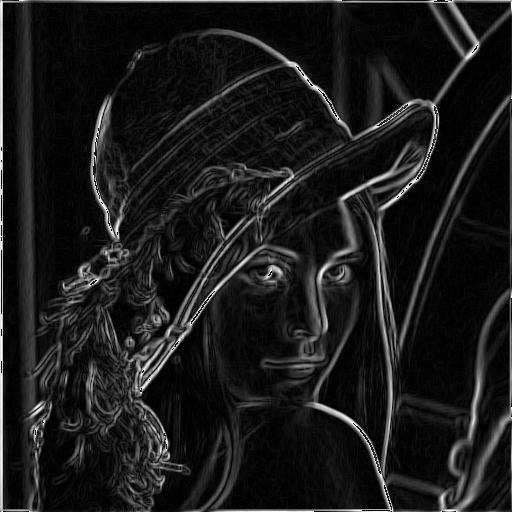

In [127]:
image_path = "prewitt_lena.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image(filename='prewitt_lena.png'))

In [128]:
matrix = np.array(img)
height, width = matrix.shape 
new_row = np.zeros(512, dtype=int)
new_matrix = np.insert(matrix, 0, new_row, axis=0)
new_matrix = np.insert(new_matrix, 513, new_row, axis=0)
new_column = np.zeros((new_matrix.shape[0], 1), dtype=int)
new_matrix = np.insert(new_matrix, [0, new_matrix.shape[1]], new_column, axis=1)
height, width = new_matrix.shape 
matrix1 = np.zeros_like(new_matrix, dtype=np.float32)
matrix2 = np.zeros_like(new_matrix, dtype=np.float32)
prewitt_filtered_matrix = np.zeros_like(new_matrix)
for y in range(1, height - 1):
    for x in range(1, width - 1):
        matrix1[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y,x-1]*(-1) + new_matrix[y+1,x-1]*(-1) + new_matrix[y-1,x+1] + new_matrix[y,x+1] + new_matrix[y+1,x+1]
        matrix2[y,x] = new_matrix[y-1,x-1]*(-1) + new_matrix[y-1,x]*(-1) + new_matrix[y-1,x+1]*(-1) + new_matrix[y+1,x-1] + new_matrix[y+1,x] + new_matrix[y+1,x+1]
gradient_magnitude = np.sqrt(np.square(matrix1) + np.square(matrix2))
gradient_direction = np.arctan2(matrix2, matrix1) * (180 / np.pi)
gradient_direction = np.absolute(gradient_direction)

In [129]:
print(gradient_magnitude)

[[  0.        0.        0.      ...   0.        0.        0.     ]
 [  0.      622.43475 638.63916 ... 422.8853  423.81717   0.     ]
 [  0.      725.4964  315.48376 ... 311.40005 363.73618   0.     ]
 ...
 [  0.      559.78656 134.23859 ...  64.14047 102.0049    0.     ]
 [  0.      485.74274 513.78204 ... 114.62984 114.62984   0.     ]
 [  0.        0.        0.      ...   0.        0.        0.     ]]


In [130]:
print(gradient_direction)

[[  0.          0.          0.        ...   0.          0.
    0.       ]
 [  0.         41.93932    95.21067   ...  79.64668   132.99211
    0.       ]
 [  0.          9.280556   99.67132   ...  36.906696  171.78079
    0.       ]
 ...
 [  0.          6.66798     3.4165883 ...  30.963758  179.4383
    0.       ]
 [  0.         41.995983   74.88181   ...  83.991     132.8789
    0.       ]
 [  0.          0.          0.        ...   0.          0.
    0.       ]]


In [131]:
height, width = gradient_magnitude.shape
print(gradient_magnitude.shape)
print(height)
print(width)

(514, 514)
514
514


In [132]:
print(gradient_direction[1,1])

41.93932


In [133]:
gradient_magnitude2 = np.zeros_like(gradient_magnitude, dtype=np.uint8)

In [134]:
for y in range(1, height - 1):
    for x in range(1, width - 1):
        angle = gradient_direction[y,x]
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            q = gradient_magnitude[y, x+1]
            r = gradient_magnitude[y, x-1]
        elif (22.5 <= angle < 67.5):
            q = gradient_magnitude[y+1, x-1]
            r = gradient_magnitude[y-1, x+1]
        elif (67.5 <= angle < 112.5):
            q = gradient_magnitude[y+1, x]
            r = gradient_magnitude[y-1, x]
        elif (112.5 <= angle < 157.5):
            q = gradient_magnitude[y-1, x-1]
            r = gradient_magnitude[y+1, x+1]
        if (gradient_magnitude[y, x] > q) and (gradient_magnitude[y, x] > r):
            gradient_magnitude2[y, x] = gradient_magnitude[y, x]
            #
        else:
            gradient_magnitude2[y,x] = 0

In [135]:
print(np.min(gradient_magnitude2))
print(np.max(gradient_magnitude2))

0
255


In [136]:
print(gradient_magnitude2)

[[  0   0   0 ...   0   0   0]
 [  0 110 126 ... 166 167   0]
 [  0 213   0 ...   0 107   0]
 ...
 [  0  47   0 ...   0 102   0]
 [  0 229   1 ... 114 114   0]
 [  0   0   0 ...   0   0   0]]


In [137]:
row_indices_to_remove = [0, 513]
column_indices_to_remove = [0, gradient_magnitude2.shape[1] - 1]
gradient_magnitude2 = np.delete(gradient_magnitude2, row_indices_to_remove, axis=0)
gradient_magnitude2 = np.delete(gradient_magnitude2, column_indices_to_remove, axis=1)
height, width = gradient_magnitude2.shape 
print(height)
print(width)
print(gradient_magnitude2)

512
512
[[110 126 165 ...   0 166 167]
 [213   0   0 ... 127   0 107]
 [240   0 241 ...   0  15   0]
 ...
 [ 71   0   0 ...   0 136   0]
 [ 47   0   0 ...   0   0 102]
 [229   1  25 ...  90 114 114]]


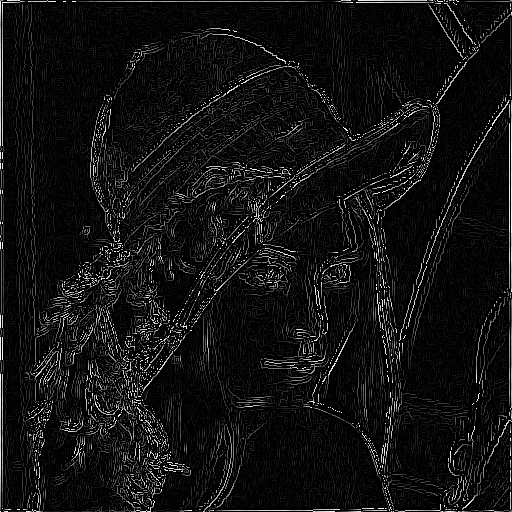

In [138]:
cv2.imwrite('sharpened_lena.png', gradient_magnitude2.astype(np.uint8))
display(Image(filename='sharpened_lena.png'))

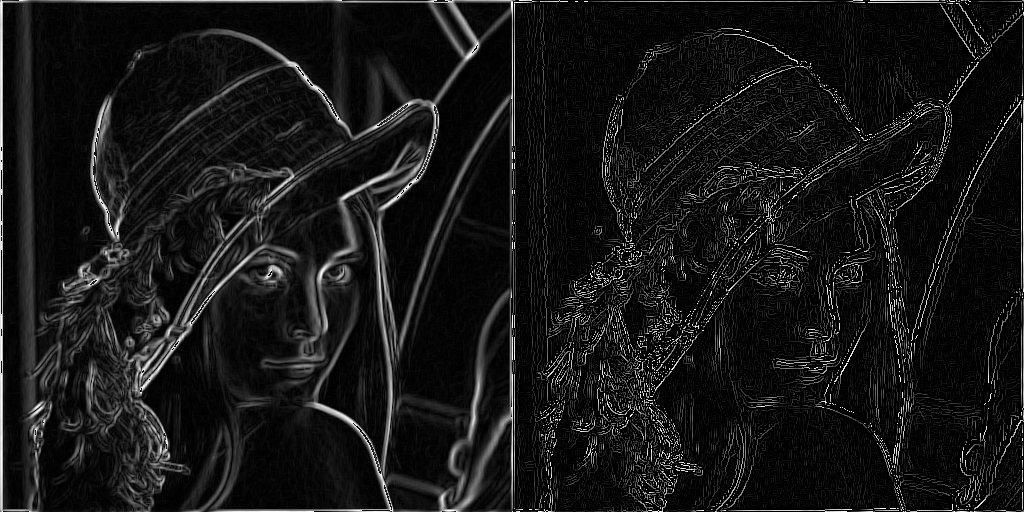

In [139]:
image1 = pimg.open('prewitt_lena.png')
image2 = pimg.open('sharpened_lena.png')
combined_image = pimg.new('RGB', (image1.width + image2.width, image1.height))
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))
display(combined_image)